In [14]:
text_list=[]
def create_token(tweet) :
  tweet=tweet.split()
  text_list.append(tweet)

In [21]:
import pandas as pd 
import gensim
from gensim import corpora, models
from gensim.models import Phrases


In [16]:
raw_data=pd.read_csv('cleaned_dataset.csv')[:20000]

In [17]:
raw_data.tail()

,title,category,cleaned_title
19995,Tips Aman Melahirkan di RS agar Tak Tertular C...,health,tips aman lahir rs tak tular corona
19996,Cara Adaptasi agar Tak Stres Ngantor Lagi di M...,health,cara adaptasi tak stres ngantor masa transisi ...
19997,RI Catatkan Penambahan Kasus Sembuh Corona Ter...,health,ri catat tambah kasus sembuh corona tinggi ase...
19998,"Pro-Kontra Olahraga Pakai Masker, Pelari dan P...",health,prokontra olahraga pakai masker lari sepeda an...
19999,Kasus Sembuh Corona RI Tembus 10 Ribu dan Ceta...,health,kasus sembuh corona ri tembus ribu cetak rekor...


In [18]:
raw_data['cleaned_title'].apply(create_token)

0        None
1        None
2        None
3        None
4        None
         ... 
19995    None
19996    None
19997    None
19998    None
19999    None
Name: cleaned_title, Length: 20000, dtype: object

In [20]:
text_list[0]

['kemnaker', 'awas', 'tka', 'meikarta']

In [24]:
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])

In [25]:
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [26]:
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)

In [27]:
print(dictionary)

Dictionary<4428 unique tokens: ['awas', 'kemnaker', 'meikarta', 'tka', 'bni']...>


In [28]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

In [29]:
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

In [30]:
for i in corpus_tfidf :
    print(i)
    break

[(0, 0.3897898094071394), (1, 0.5315212570257594), (2, 0.5261537081396318), (3, 0.5373186514750977)]


In [31]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.lsimodel import LsiModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [36]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics) #iterations=100, passes=10
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [38]:
start=20
limit=40
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start, limit=limit, step=step)

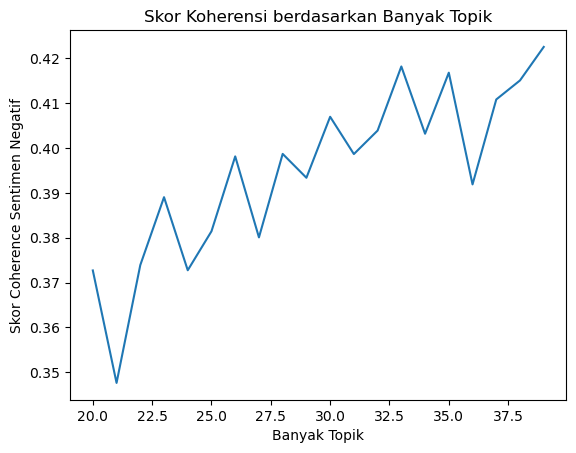

In [39]:
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.title('Skor Koherensi berdasarkan Banyak Topik')
plt.xlabel("Banyak Topik")
plt.ylabel("Skor Coherence Sentimen Negatif")
plt.show()

In [41]:
for idx, topic in model_list.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

AttributeError: 'list' object has no attribute 'print_topics'